# Ejercicio 1

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def image_to_array(image: str):
    image = cv2.imread(f'images/{image}', cv2.IMREAD_GRAYSCALE)
    array = np.asarray(image, dtype=np.float32) / 255.0

    x1 = array[:-1, :].ravel()
    x2 = array[1:, :].ravel()
    
    return np.stack((x1, x2), 1)

### a)

In [ ]:
def show_image(axis, image: str, title: str = 'Imagen Original') -> None:
    image = cv2.imread(f'images/{image}', cv2.IMREAD_GRAYSCALE)
    
    axis.imshow(image, cmap="gray")
    axis.set_title(title)
    axis.axis("off")
    
def show_dispersion(axis, x1: np.ndarray, x2: np.ndarray, _s: int = 4, _alpha: float = 0.6, title: str = 'Dispersión de pares verticales') -> None:
    axis.scatter(x1, x2, s=_s, alpha=_alpha)    
    axis.set_title(title)
    axis.set_xlabel("X₁")
    axis.set_ylabel("X₂")
    
def show_image_and_dispersion(image: str, s: float = 4, alpha: float = 0.6, _figsize: tuple[float, float] = (14, 7)) -> None:
    X = image_to_array(image)

    x1 = X[:, 0]
    x2 = X[:, 1]

    fig, axes = plt.subplots(1, 2, figsize=_figsize)

    show_image(axes[0], image)
    show_dispersion(axes[1], x1, x2, s, alpha)

    plt.tight_layout()
    plt.show()

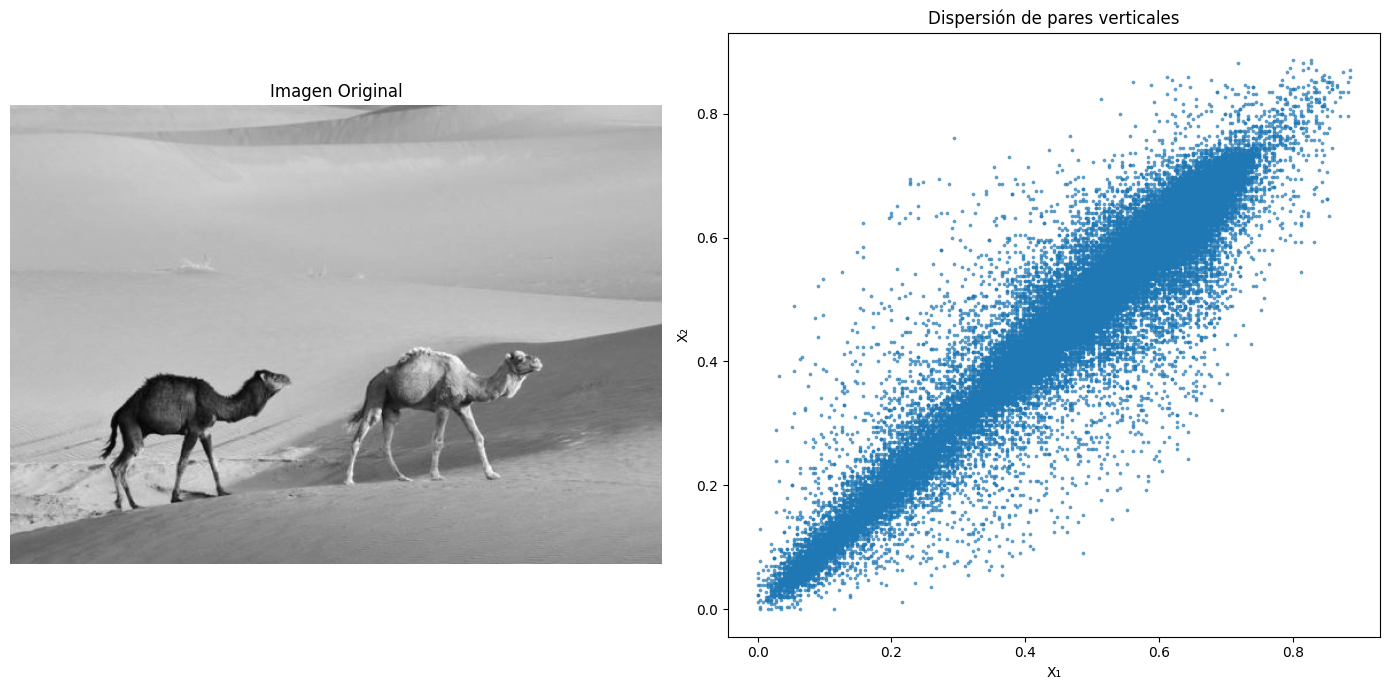

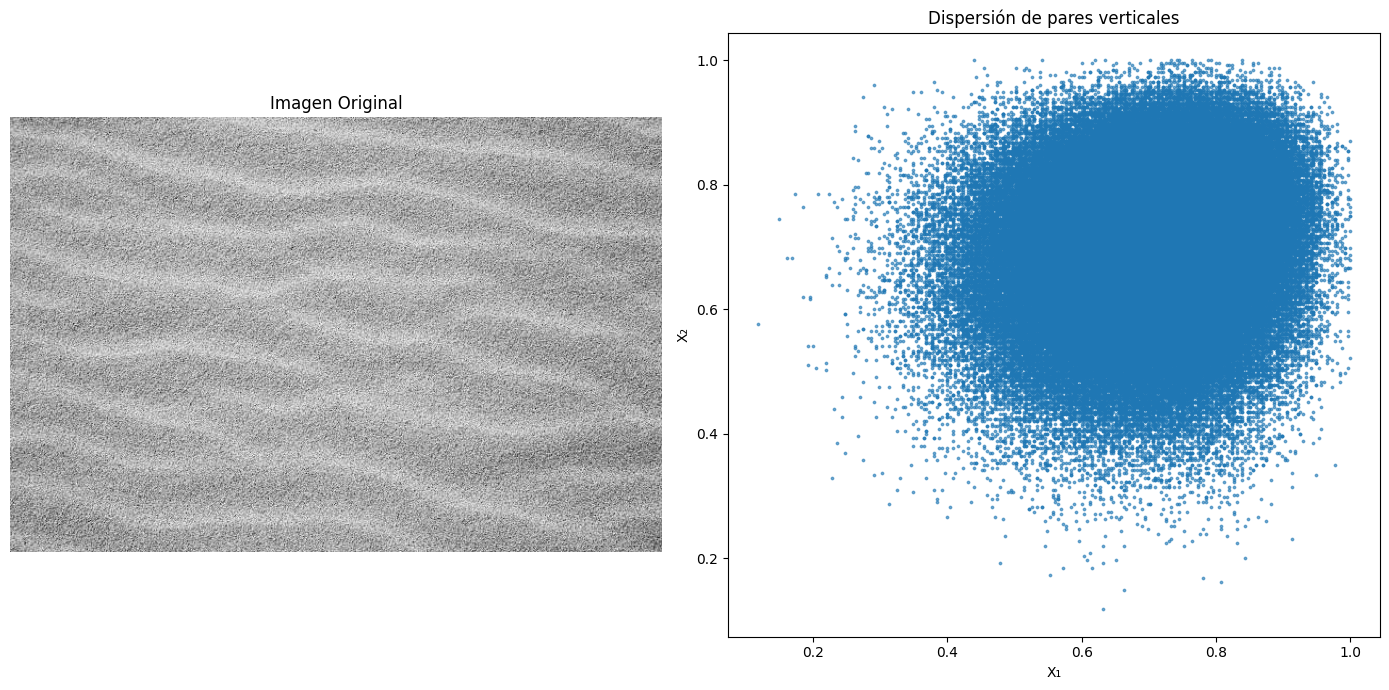

In [58]:
show_image_and_dispersion('img_01.jpg')
show_image_and_dispersion('img_02.jpg')

### b)

In [63]:
def decorrelation(x: np.ndarray):
    mean = np.mean(x, axis=0)
    x_centered = x - mean
    
    cov_matrix = np.cov(x_centered, rowvar=False)
    
    avals, avecs = np.linalg.eigh(cov_matrix)
    
    sorted_avals = np.argsort(avals)[::-1]
    sorted_avecs = avecs[:,sorted_avals]
    
    return x_centered @ sorted_avecs

def graficar_vector(vect, labels, _s: float = 4, _alpha: float = 0.6, title: str = 'Dispersión', _figsize: tuple[float, float] = (7, 7)):
    plt.figure(figsize=_figsize)
    plt.scatter(vect[:, 0], vect[:, 1], s=_s, alpha=_alpha)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(title)
    plt.tight_layout()
    plt.show()

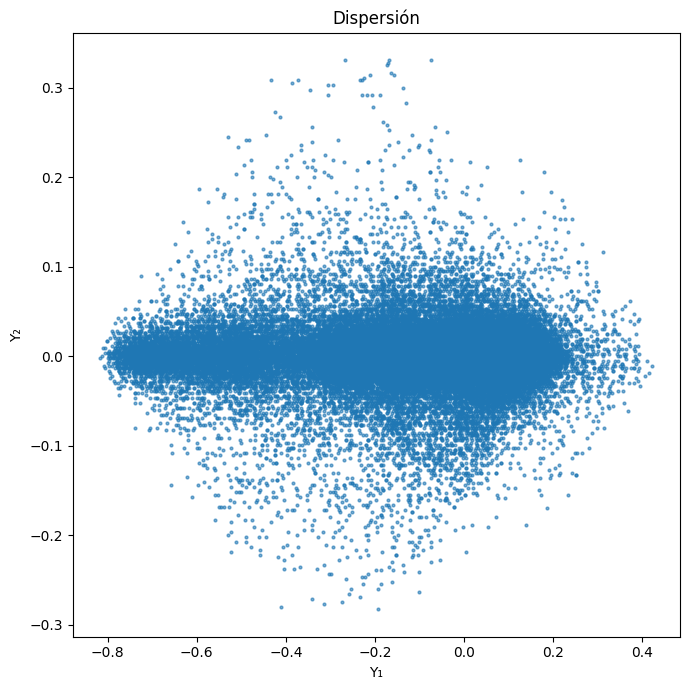

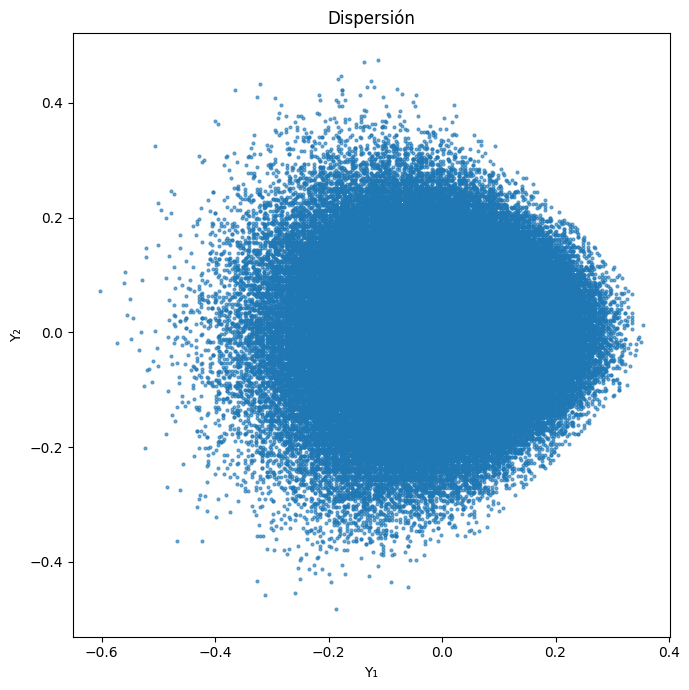

In [64]:
x1 = image_to_array('img_01.jpg')
decorrelation1 = decorrelation(x1)

graficar_vector(decorrelation1, ['Y₁', 'Y₂'])

x2 = image_to_array('img_02.jpg')
decorrelation2 = decorrelation(x2)

graficar_vector(decorrelation2, ['Y₁', 'Y₂'])

# Ejercicio 2

In [ ]:
def image_to_blocks(image: str, block: int = 8):
    img = cv2.imread(f'images/{image}', cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.float32) / 255.0 #normalizo

    # dimensiones originales
    height, width = img.shape

    # padding (lleno con pixeles extra los bordes para que me queden bloques no solapados)
    pad_height = (block - (height % block)) % block
    pad_width = (block - (width % block)) % block
    pad_img = np.pad(img, ((0, pad_height), (0, pad_width)), mode='reflect') # rellenamos con valores reflejados
    new_height, new_width = pad_img.shape

    # nos guardamos cada bloque y su posición
    blocks = []
    pos = []

    for i in range(0, new_height, block):
        for j in range(0, new_width, block):
            b = pad_img[i: i + block, j: j + block].ravel()
            blocks.append(b)
            pos.append((i, j))
    
    X = np.array(blocks, dtype=np.float32)
    
    return X, pos, (new_height, new_width), (height, width)

In [ ]:
def pca_transform(X, k):
    return None